# Optimization of Four Machine Learning Models to understand the Auto Insurance Clients
## Yijun, Brenna, Ting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

# 1. KNN

## 1.1 Data cleaning

In [54]:
df = pd.read_csv("Car_Insurance_Claim.csv")
df = df.drop(['ID'], axis=1)
df.isnull().sum()
df = df.fillna(df.mean())
df.head(10)
df.info()
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")

categorical_col.append('POSTAL_CODE')
for i in range(0, df.shape[0]):
    df['ANNUAL_MILEAGE'][i] = float(df['ANNUAL_MILEAGE'][i])
    if(df['ANNUAL_MILEAGE'][i]  < 5000): df['ANNUAL_MILEAGE'][i] = 'less than 5000'
    elif(5000 <= df['ANNUAL_MILEAGE'][i]  < 7500 ): df['ANNUAL_MILEAGE'][i]  = '[5000, 7500)'
    elif(7500 <= df['ANNUAL_MILEAGE'][i]  < 10000  ): df['ANNUAL_MILEAGE'][i]  = '[7500, 10000)'
    elif(10000 <= df['ANNUAL_MILEAGE'][i] < 12500 ): df['ANNUAL_MILEAGE'][i]  = '[10000, 12500)'
    elif(12500 <= df['ANNUAL_MILEAGE'][i]  < 15000 ): df['ANNUAL_MILEAGE'][i]  = '[12500, 15000)'
    elif(15000 <= df['ANNUAL_MILEAGE'][i]  < 17500 ): df['ANNUAL_MILEAGE'][i]  = '[15000, 17500)'
    elif(17500 <= df['ANNUAL_MILEAGE'][i]  < 20000 ): df['ANNUAL_MILEAGE'][i]  = '[17500, 20000)'
    elif( 20000 <= df['ANNUAL_MILEAGE'][i]): df['ANNUAL_MILEAGE'][i]  = 'more than 200000'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null  

In [55]:
categorical_col.append('ANNUAL_MILEAGE')
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
    
df.head()

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     0                   0          0       2      0.629027   
1    0       1     0                   0          1       1      0.357757   
2    0       0     0                   0          0       3      0.493146   
3    0       1     0                   0          2       3      0.206013   
4    1       1     0                   1          1       3      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                1.0             0      0.0       1.0            0   
1                0.0             1      0.0       0.0            0   
2                1.0             1      0.0       0.0            0   
3                1.0             1      0.0       1.0            2   
4                1.0             1      0.0       0.0            2   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0               0             0                    0     0               0   
1               2             0                    0     0               0   
2               0             0                    0     0               0   
3               0             0                    0     0               0   
4               0             0                    2     0               1   

   OUTCOME  
0      0.0  
1      1.0  
2      0.0  
3      0.0  
4      1.0

In [58]:

X_data= df[['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']]
y_data = df['OUTCOME']


## 1.2 PCA

In [59]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X_data) 
pca.components_
pca.components_.T
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_data.columns)
loadings

PC1       PC2
AGE                  0.238696 -0.065989
GENDER               0.038875 -0.014950
RACE                -0.001805  0.001369
DRIVING_EXPERIENCE   0.292548 -0.098299
EDUCATION            0.040331 -0.004988
INCOME               0.037105 -0.004832
CREDIT_SCORE         0.013500 -0.002621
VEHICLE_OWNERSHIP    0.031668 -0.011190
VEHICLE_YEAR        -0.025748  0.004603
MARRIED              0.057523  0.017768
CHILDREN             0.051305 -0.001601
POSTAL_CODE          0.056436  0.095936
ANNUAL_MILEAGE       0.173299  0.968835
VEHICLE_TYPE        -0.000372  0.000152
SPEEDING_VIOLATIONS  0.789317 -0.062098
DUIS                 0.085468 -0.019406
PAST_ACCIDENTS       0.426132 -0.182098

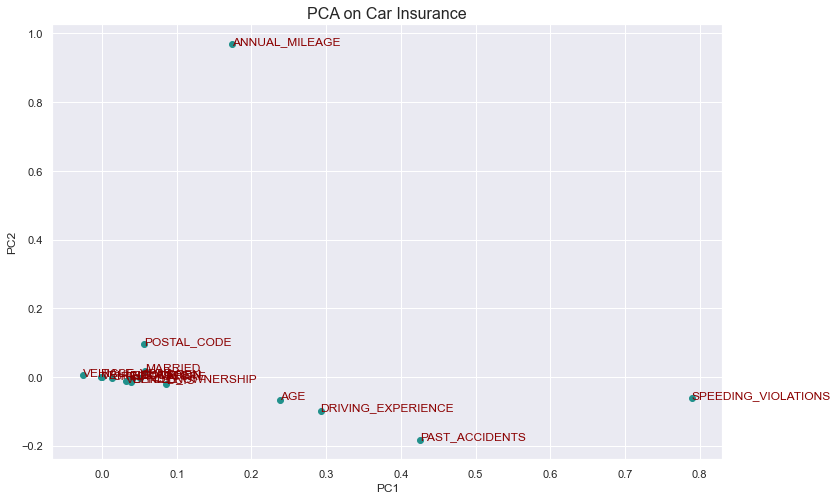

In [60]:

sns.set(font_scale=1)
sns.set_style('darkgrid')
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111) 

ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('PCA on Car Insurance', fontsize = 16)

plt.scatter(loadings['PC1'], loadings['PC2'],color='#21918C')

n = loadings.index.values.copy() 
x = loadings['PC1'].values.copy()
y = loadings['PC2'].values.copy()


for i, txt in enumerate(n): 
    plt.annotate(txt, (x[i], y[i]),size=12,color='darkred')  




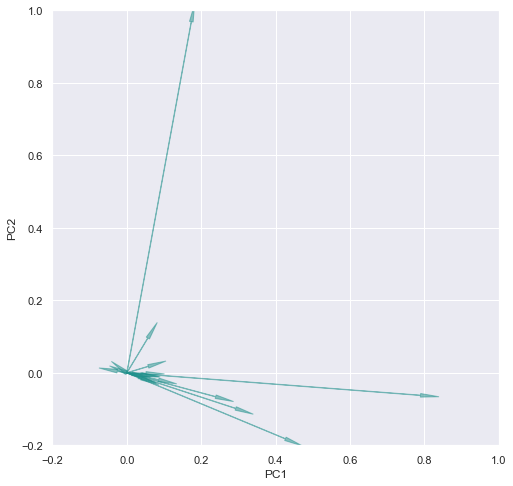

In [61]:

sns.set(font_scale=1)

def loading_plot(coeff, labels):
    n = coeff.shape[0]
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.01, head_length = 0.05, color = '#21918C',alpha = 0.5)
    sns.set_style('darkgrid')
    plt.xlim(-0.2,1)
    plt.ylim(-0.2,1)
    plt.xlabel('PC1', size=12)
    plt.ylabel('PC2', size=12)


fig, ax = plt.subplots(figsize = (8,8))
loading_plot(pca.components_.T, X_data.columns)

## 1.3 KNN with PCA, 2pc

In [62]:
#knn with pc=2

pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(X_data) 


print(pca.explained_variance_)

X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42)

[7.04030563 3.26848231]


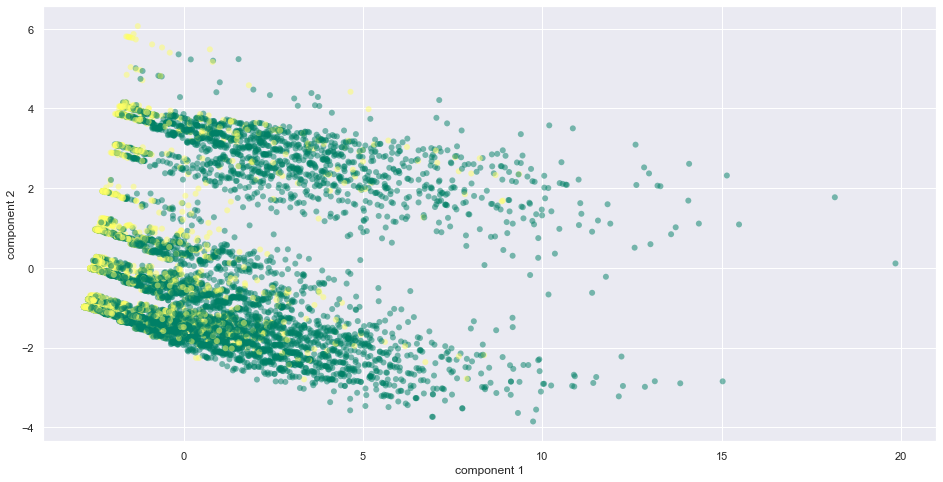

In [63]:

plt.style.context('ggplot')

plt.figure(figsize=(16,8))
plt.scatter(X[:, 0], X[:, 1],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('summer', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()


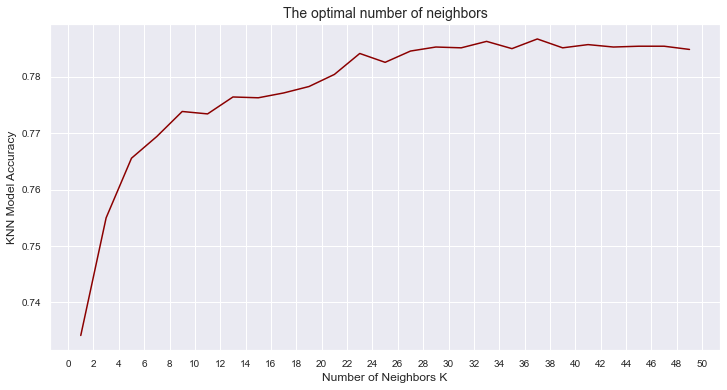

In [64]:
# choose best K when PC=2
from matplotlib.pyplot import MultipleLocator 

k_candidate = list(range(1,50,2))

k_scores = {}

for k in k_candidate:
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy' )
    k_scores[k] = fold_scores.mean()


plt.style.context('ggplot')

plt.figure(figsize=(12,6))
plt.plot(k_scores.keys(), k_scores.values(),c='darkred')
plt.title("The optimal number of neighbors", size=14)
plt.xlabel("Number of Neighbors K",size=12)
plt.ylabel("KNN Model Accuracy",size=12)
plt.tick_params(axis='both',which='major',labelsize=10)
x_major_locator=MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.show()

In [65]:

classifier = KNeighborsClassifier(n_neighbors=37)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [67]:

# Then, we predict the confidence score of the model for each of the data points in the test set. We will use shapes to denote the true labels, and the color will indicate the confidence of the model for assign that score.
import plotly.express as px

sns.set(font_scale=0.6)
plt.style.context('ggplot')
plt.figure(figsize=(20,8))

y_score = classifier.predict_proba(X_test)[:, 1]

print(y_score)

fig = px.scatter(
    X_test, x=0, y=1,
    color=y_score, color_continuous_scale='RdBu',
    symbol=y_test, symbol_map={'1': 'square-dot', '0': 'circle-dot'},
    labels={'symbol': 'label', 'color': "Label '1'"}
)
fig.update_traces(marker_size=6, marker_line_width=0.4)
fig.update_layout(legend_orientation='h')
fig.show()


[0.2972973  0.02702703 0.83783784 ... 0.75675676 0.32432432 0.08108108]


<Figure size 1440x576 with 0 Axes>

Accuracy of our model is equal to 79.27%
[[1830  233]
 [ 389  548]]


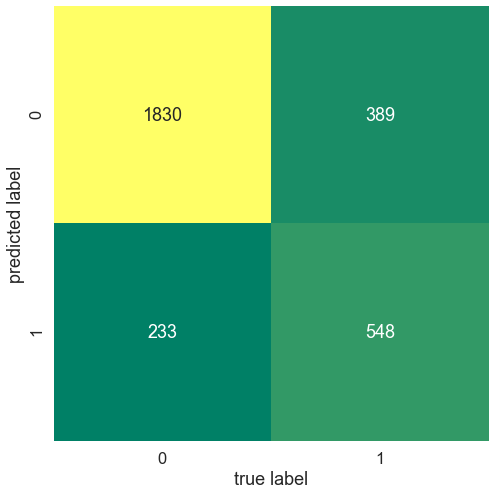

In [68]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')
Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)


sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
mat_knn_1 = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_knn_1.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## 1.4 Optimize KNN with PCA

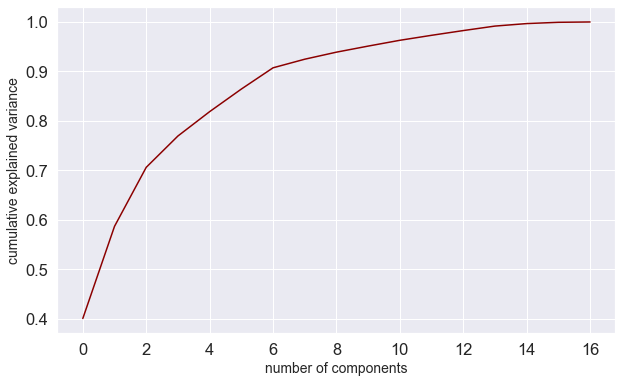

In [70]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_data)

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='darkred')
plt.xlabel('number of components',size=14)
plt.ylabel('cumulative explained variance',size=14)
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)


pca = PCA(n_components=17)
X_train_transformed = pca.fit_transform(X_train)
X_submission_transformed = pca.transform(X_test)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_transformed, y_train, test_size=0.2, random_state=42)



In [72]:
components = list(range(1,18))
neighbors = list(range(1,30,2))


best = {}
best['score'] = 0
scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )


for j,component in enumerate(components):  
    for i,n in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)

        scores[component][n] = score
        
        
        if score > best['score']:
            best['score'] = score
            best['k'] = n
            best['component'] = component
print(best)



{'score': 0.8342857142857143, 'k': 19, 'component': 13}


In [73]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_pca[:, :13], y_train_pca)

pred_knn= knn.predict(X_submission_transformed[:, :13])

accuracy = accuracy_score(y_test, pred_knn)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')



Conf_matrix = confusion_matrix(y_test, pred_knn)
print(Conf_matrix)


Accuracy of our model is equal to 82.63%
[[1830  233]
 [ 288  649]]


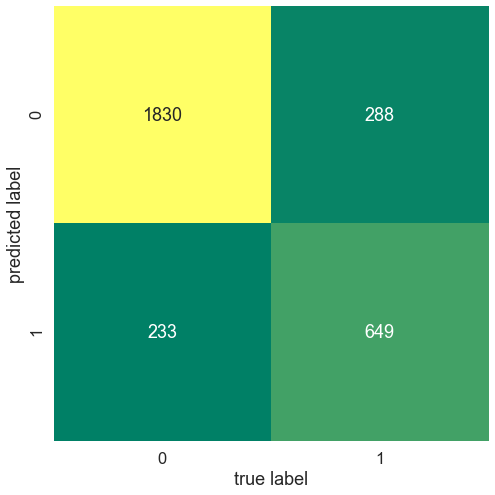

In [74]:
sns.set(font_scale=1.5)
plt.figure(figsize=(12,8))
mat2 = confusion_matrix(y_test, pred_knn)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## 1.5 ROC AUC

Best Threshold=0.368421, G-Mean=0.811


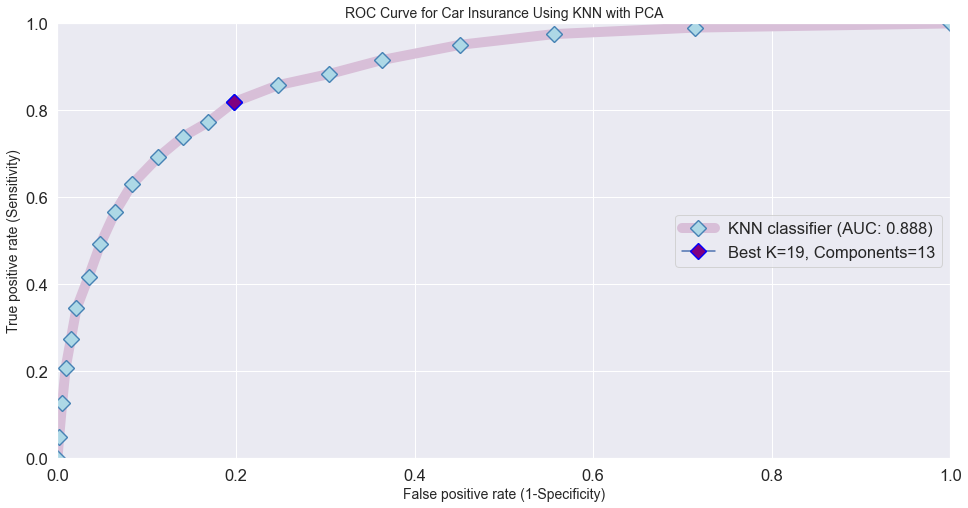

In [76]:
# KNN ROC Plot

sns.set(font_scale=1.5)
plt.figure(figsize = (16,8))

y_pred_prob_yes=knn.predict_proba(X_submission_transformed[:, :13])


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

fig = plt.plot(fpr,tpr,color='thistle',
         marker='D', linewidth = 10, 
         markerfacecolor='lightblue',markeredgecolor='steelblue', 
         markeredgewidth=1.4, markersize = 12,markevery=1,
         label = "KNN classifier (AUC: 0.888)")

plt.plot(fpr[ix], tpr[ix], 
           marker='D', 
         markerfacecolor='purple',markeredgecolor='blue', 
         markeredgewidth=1.4, markersize = 12,
         label = "Best K=19, Components=13")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC Curve for Car Insurance Using KNN with PCA',size=14)
plt.xlabel('False positive rate (1-Specificity)', size=14)
plt.ylabel('True positive rate (Sensitivity)',size=14)
plt.legend(loc='center right')
plt.grid(True)
plt.show()


AUC = round(metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1]),3)



# 2. Random forest

## 2.1 default random forest

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89      2142
         1.0       0.70      0.77      0.73       858

    accuracy                           0.84      3000
   macro avg       0.80      0.82      0.81      3000
weighted avg       0.84      0.84      0.84      3000



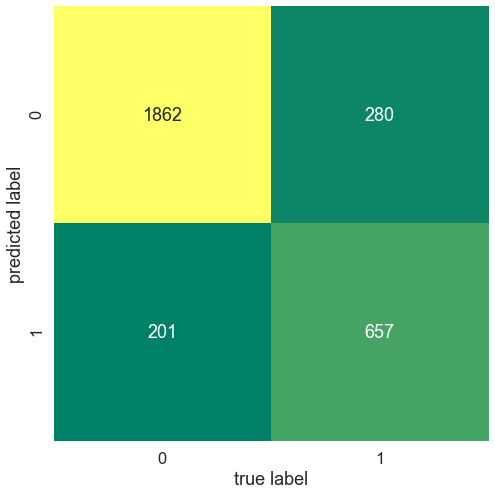

In [77]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42) #n_estimators=100
model.fit(X_train, y_train)

ypred = model.predict(X_test)
print(metrics.classification_report(ypred, y_test))


plt.figure(figsize=(16,8))
mat_rf = confusion_matrix(y_test, ypred)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()



## 2.2 tunned random forest

In [78]:
# current Random Forest's parameters
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [79]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 50, 100, 150],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 150]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [80]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_ 

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [81]:
print(best_params)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [82]:
rm_clf = RandomForestClassifier(**best_params)
rm_clf.fit(X_train, y_train)

print(f"Best paramters: {best_params})")

ypred_improved = rm_clf.predict(X_test)
print(metrics.classification_report(ypred_improved, y_test))

Best paramters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50})
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      2116
         1.0       0.73      0.77      0.75       884

    accuracy                           0.85      3000
   macro avg       0.82      0.83      0.82      3000
weighted avg       0.85      0.85      0.85      3000



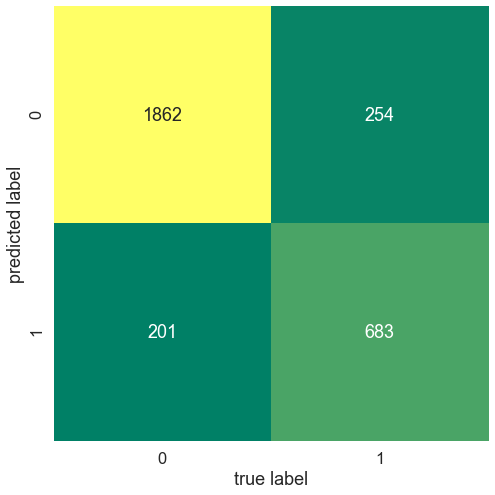

In [83]:

plt.figure(figsize=(16,8))
mat_rm_improved = confusion_matrix(y_test, ypred_improved)
sns.heatmap(mat_rm_improved.T, square=True, annot=True, fmt='d', cbar=False,cmap='summer') 
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## 2.3 ROC AUC

Best Threshold=0.320000, G-Mean=0.837


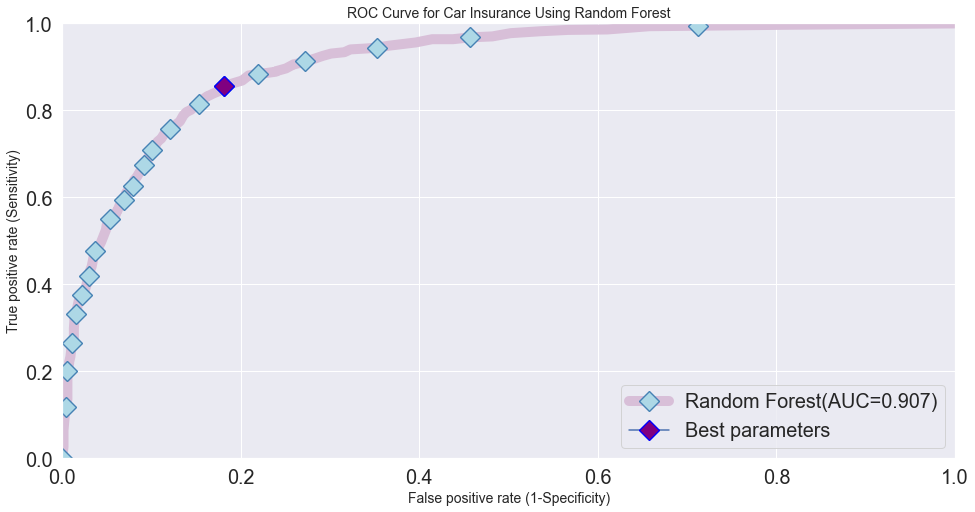

In [84]:

plt.figure(figsize = (16,8))
sns.set(font_scale=1.8)
y_pred_prob_yes=model.predict_proba(X_test)
AUC = round(metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1]),3)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])


gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

fig = plt.plot(fpr,tpr,color='thistle',
         marker='D', linewidth = 10, 
         markerfacecolor='lightblue',markeredgecolor='steelblue', 
         markeredgewidth=1.4, markersize = 14,markevery=7,
         label = "Random Forest(AUC=0.907)")

plt.plot(fpr[ix], tpr[ix], 
           marker='D', 
         markerfacecolor='purple',markeredgecolor='blue', 
         markeredgewidth=1.4, markersize = 14,markevery=7,
         label = "Best parameters")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC Curve for Car Insurance Using Random Forest',size=14)
plt.xlabel('False positive rate (1-Specificity)',size=14)
plt.ylabel('True positive rate (Sensitivity)',size=14)
plt.legend(loc='lower right')
plt.grid(True)


plt.show()


# 3. logistic regression

## 3.1 data cleaning

In [2]:
df = pd.read_csv("Car_Insurance_Claim.csv")

In [3]:
df = df.drop(['ID'], axis=1)
df.isnull().sum()
df = df.fillna(df.mean())    

df.shape

(10000, 18)

In [4]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")

#df['POSTAL_CODE'].unique()  
categorical_col.append('POSTAL_CODE')


AGE : ['65+' '16-25' '26-39' '40-64']
GENDER : ['female' 'male']
RACE : ['majority' 'minority']
DRIVING_EXPERIENCE : ['0-9y' '10-19y' '20-29y' '30y+']
EDUCATION : ['high school' 'none' 'university']
INCOME : ['upper class' 'poverty' 'working class' 'middle class']
VEHICLE_YEAR : ['after 2015' 'before 2015']
VEHICLE_TYPE : ['sedan' 'sports car']


In [5]:
df['ANNUAL_MILEAGE']

0       12000.000000
1       16000.000000
2       11000.000000
3       11000.000000
4       12000.000000
            ...     
9995    16000.000000
9996    11697.003207
9997    14000.000000
9998    13000.000000
9999    13000.000000
Name: ANNUAL_MILEAGE, Length: 10000, dtype: float64

In [6]:

for i in range(0, df.shape[0]):
    df['ANNUAL_MILEAGE'][i] = np.float(df['ANNUAL_MILEAGE'][i])
    if(df['ANNUAL_MILEAGE'][i]  < 5000): df['ANNUAL_MILEAGE'][i] = 'less than 5000'
    elif(5000 <= df['ANNUAL_MILEAGE'][i]  < 7500 ): df['ANNUAL_MILEAGE'][i]  = '[5000, 7500)'
    elif(7500 <= df['ANNUAL_MILEAGE'][i]  < 10000  ): df['ANNUAL_MILEAGE'][i]  = '[7500, 10000)'
    elif(10000 <= df['ANNUAL_MILEAGE'][i] < 12500 ): df['ANNUAL_MILEAGE'][i]  = '[10000, 12500)'
    elif(12500 <= df['ANNUAL_MILEAGE'][i]  < 15000 ): df['ANNUAL_MILEAGE'][i]  = '[12500, 15000)'
    elif(15000 <= df['ANNUAL_MILEAGE'][i]  < 17500 ): df['ANNUAL_MILEAGE'][i]  = '[15000, 17500)'
    elif(17500 <= df['ANNUAL_MILEAGE'][i]  < 20000 ): df['ANNUAL_MILEAGE'][i]  = '[17500, 20000)'
    elif( 20000 <= df['ANNUAL_MILEAGE'][i]): df['ANNUAL_MILEAGE'][i]  = 'more than 200000'


In [7]:
categorical_col.append('ANNUAL_MILEAGE')

In [8]:
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])
    

In [9]:
df.head()

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     0                   0          0       2      0.629027   
1    0       1     0                   0          1       1      0.357757   
2    0       0     0                   0          0       3      0.493146   
3    0       1     0                   0          2       3      0.206013   
4    1       1     0                   1          1       3      0.388366   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                1.0             0      0.0       1.0            0   
1                0.0             1      0.0       0.0            0   
2                1.0             1      0.0       0.0            0   
3                1.0             1      0.0       1.0            2   
4                1.0             1      0.0       0.0            2   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0               0             0                    0     0               0   
1               2             0                    0     0               0   
2               0             0                    0     0               0   
3               0             0                    0     0               0   
4               0             0                    2     0               1   

   OUTCOME  
0      0.0  
1      1.0  
2      0.0  
3      0.0  
4      1.0

## 3.2 Label  Explanation
#10238    New York, NY, US
#32765    Oviedo, FL , US
#92101    San Diego, CA, US
#21217    Baltimorem, MD US

    Gender: 0 for female   ; 1 for male
    DRIVING_EXPERIENCE: 0 for 0-9y; 1 for 10-19y ; 2 for 20-29y ; 3 for 30y+
    Vehicle_ownership: 0 for not self-owned ; 1 for self-owned
    Vehicle year     : 0 for after 2015 ; 1 for before 2015
    postal code      : 0 for New york; 1 for Baltimorem ; 2 for Oviedo; 3 for San Diego

    

        

## 3.3 Building logistic model

In [10]:
#Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [11]:
df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [12]:
# select using backward selection

X = df[['GENDER',
   'DRIVING_EXPERIENCE',
   'VEHICLE_OWNERSHIP',
   'VEHICLE_YEAR',
   'POSTAL_CODE',
   'SPEEDING_VIOLATIONS']] # select the varaibles with least mse value

y = df['OUTCOME']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [14]:
X_test.shape 

(3000, 6)

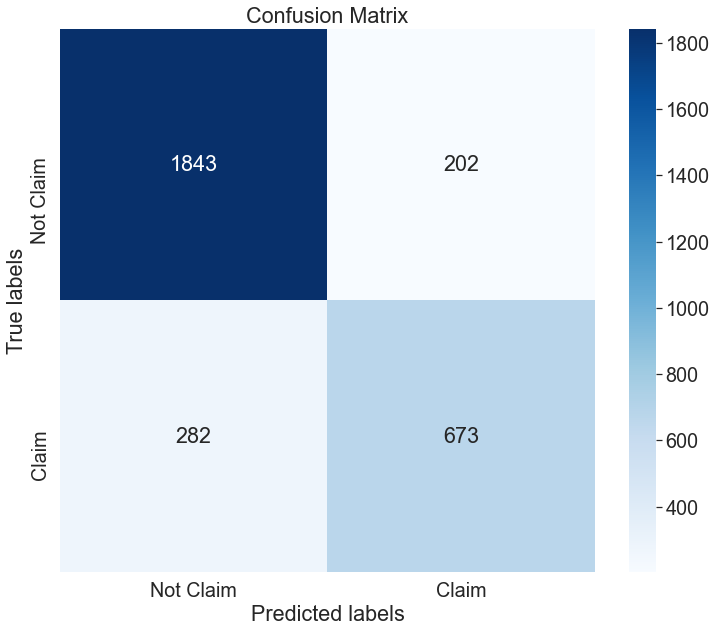

In [15]:
sns.set(font_scale=1.8)
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (12,10))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Claim', 'Claim']); ax.yaxis.set_ticklabels([ 'Not Claim','Claim']);

plt.show()


In [16]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),3))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.839


In [17]:
print("intercept:", logreg.intercept_)
print("coef:", logreg.coef_)

intercept: [-0.47476385]
coef: [[ 0.96299596 -1.8140748  -1.77276091  1.79893638  0.50647599 -0.07172369]]


In [18]:
var_name = np.array([['GENDER',
   'DRIVING_EXPERIENCE',
   'VEHICLE_OWNERSHIP',
   'VEHICLE_YEAR',
   'POSTAL_CODE',
   'SPEEDING_VIOLATIONS']]).reshape((1,6))
var_coe = np.array(logreg.coef_).reshape((1,6))

var_result = {
        'variable name': ['GENDER','DRIVING_EXPERIENCE','VEHICLE_OWNERSHIP','VEHICLE_YEAR','POSTAL_CODE','SPEEDING_VIOLATIONS'], 
        'Coefficient': [ 0.96299596, -1.8140748,  -1.77276091,  1.79893638  ,0.50647599, -0.07172369]}  
var_df = pd.DataFrame(var_result)  

var_df["odds ratio"] = 2.718281828 ** (var_df['Coefficient'])
var_df.head(10)

variable name  Coefficient  odds ratio
0               GENDER     0.962996    2.619533
1   DRIVING_EXPERIENCE    -1.814075    0.162989
2    VEHICLE_OWNERSHIP    -1.772761    0.169863
3         VEHICLE_YEAR     1.798936    6.043216
4          POSTAL_CODE     0.506476    1.659433
5  SPEEDING_VIOLATIONS    -0.071724    0.930788

- If the intercept has a negative sign: then the probability of having the outcome will be < 0.5. 
- If the intercept has a positive sign: then the probability of having the outcome will be > 0.5. 

## 3.4 Conclusion from the coefficient

- Male group has 2.619 times the odds of female group of filing a claim.

- 30y+ driving experience group has 0.16 odds than 20-29y driving experience group of filing a claim.  <br /> 
  With 10 years of extra in driving experience, drivers drop the probability of filing a claim by 84%.
  
- Self-owned group has 0.17 odds than not self-owned group of filing a claim.

- Old car (before 2015) has 6.0 times the odd of new car (after 2015) of filling a claim.

- San Diego area has 1.66 times the odds of Oviedo area of filing a claim. Then baltimorem, then new york. 

- one more extra in speeding violations, has 0.9 times the odds of fewer one of filing a claim. so not that correct.

  
    Gender: 0 for female   ; 1 for male
    DRIVING_EXPERIENCE: 0 for 0-9y; 1 for 10-19y ; 2 for 20-29y ; 3 for 30y+
    Vehicle_ownership: 0 for not self-owned ; 1 for self-owned
    Vehicle year     : 0 for after 2015 ; 1 for before 2015
    postal code      : 0 for New york; 1 for Baltimorem ; 2 for Oviedo; 3 for San Diego


In [19]:
select_variables = np.array([['GENDER',
   'DRIVING_EXPERIENCE',
   'VEHICLE_OWNERSHIP',
   'VEHICLE_YEAR',
   'POSTAL_CODE',
   'SPEEDING_VIOLATIONS']])
select_variables

array([['GENDER', 'DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP',
        'VEHICLE_YEAR', 'POSTAL_CODE', 'SPEEDING_VIOLATIONS']],
      dtype='<U19')

In [20]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      2045
         1.0       0.77      0.70      0.74       955

    accuracy                           0.84      3000
   macro avg       0.82      0.80      0.81      3000
weighted avg       0.84      0.84      0.84      3000



## 3.5 ROC AUC

###  remark on ROC 
- in y axis, is the true positive rate. It tells you the propotion of **not claim** sample that were correctly classified as **not calim**.
- in x axis, is the false positive rate. It tells you the propotion of **claim** samples that were incorrectly classified as **not claim**.
- each point in ROC represent the result from one thredhold value for the logistic regression model.
- roc graph summarizes all of confusion matrices that each thredhold produced

### remark on auc
- It is used to evaluate each model. Larger the auc value is, better the model is.

### find the optimun shredhold

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

Best Threshold=0.344042, G-Mean=0.831


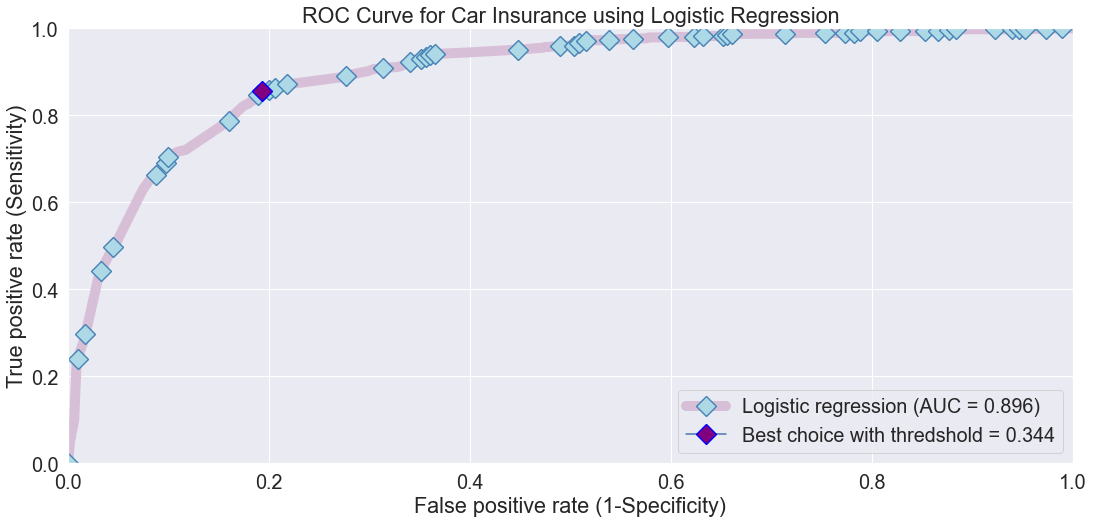

0.896

In [21]:
plt.figure(figsize = (18,8))

y_pred_prob_yes=logreg.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

fig = plt.plot(fpr,tpr,color='thistle',
         marker='D', linewidth = 10, 
         markerfacecolor='lightblue',markeredgecolor='steelblue', 
         markeredgewidth=1.4, markersize = 14,markevery=7,
         label = "Logistic regression (AUC = 0.896)")

plt.plot(fpr[ix], tpr[ix], 
           marker='D', 
         markerfacecolor='purple',markeredgecolor='blue', 
         markeredgewidth=1.4, markersize = 14,markevery=7,
         label = "Best choice with thredshold = 0.344")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC Curve for Car Insurance using Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#AUC - Area Under Curve

round(metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1]),3)




## 3.6 backward selection for logistic regression

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error




def backward_selection_k(X,y,k):
    all_mse=[]
    all_best_models=[] 
    list_column=[]
    kf_all = KFold(n_splits=k, random_state=0, shuffle=True)# get the MSE for all columns
    mse_total = []
    for train_index,test_index in kf_all.split(X):#perform k folds
        X_train, y_train = X.iloc[train_index], y.iloc[train_index]
        X_test, y_test = X.iloc[test_index], y.iloc[test_index]

        log = LogisticRegression()
        log.fit(X_train,y_train)
        y_pred = log.predict(X_test)

        mse_total.append(mean_squared_error(y_test,y_pred))

    ave_mse = np.mean(mse_total)
    all_mse.append(ave_mse)
    all_best_models.append(X.columns.values.tolist())

    for j in range(len(X.columns)-1):#run the rest of the model
        list_mse=[]
        list_new_column=[]
        a=X
        for b in range(len(a.columns)):
            new_column = X.drop(X.columns[b],axis=1)
            kf = KFold(n_splits=k, random_state=1, shuffle=True)
            mse_total = []
            all_coef = []
            all_intercept = []
            for train_index,test_index in kf.split(new_column):#perform k folds
                new_column_train, y_train = new_column.iloc[train_index], y.iloc[train_index]
                new_column_test, y_test = new_column.iloc[test_index], y.iloc[test_index]

                log = LogisticRegression()
                log.fit(new_column_train,y_train)
                y_pred = log.predict(new_column_test)

                mse_total.append(mean_squared_error(y_test,y_pred))
                all_coef.append(log.coef_)
                all_intercept.append(log.intercept_)

            ave_mse = np.mean(mse_total)
            list_mse.append(ave_mse)#add the average MSE instead of the minimum to the list
            list_new_column.append(new_column)

        all_mse.append(list_mse[np.argsort(list_mse)[0]])
        X=list_new_column[np.argsort(list_mse)[0]]
        all_best_models.append(X.columns.values.tolist())
        
    return all_mse,all_best_models

backward_selection_k(X,y,10)

# 4. Naive Bayes

## 4.1 Data cleaning

In [22]:
df = pd.read_csv("Car_Insurance_Claim.csv")
df.head(30)
# information
df.info()
#Rows and Columns
df.shape
# what are the columns
df.columns
#Describing the data
df.describe()
#Checking null values
df.isnull().sum()
#To check total number of rows with NA values
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)  




for i in range(0, df.shape[0]):
    df['ANNUAL_MILEAGE'][i] = float(df['ANNUAL_MILEAGE'][i])
    if(df['ANNUAL_MILEAGE'][i]  < 5000): df['ANNUAL_MILEAGE'][i] = 'less than 5000'
    elif(5000 <= df['ANNUAL_MILEAGE'][i]  < 7500 ): df['ANNUAL_MILEAGE'][i]  = '[5000, 7500)'
    elif(7500 <= df['ANNUAL_MILEAGE'][i]  < 10000  ): df['ANNUAL_MILEAGE'][i]  = '[7500, 10000)'
    elif(10000 <= df['ANNUAL_MILEAGE'][i] < 12500 ): df['ANNUAL_MILEAGE'][i]  = '[10000, 12500)'
    elif(12500 <= df['ANNUAL_MILEAGE'][i]  < 15000 ): df['ANNUAL_MILEAGE'][i]  = '[12500, 15000)'
    elif(15000 <= df['ANNUAL_MILEAGE'][i]  < 17500 ): df['ANNUAL_MILEAGE'][i]  = '[15000, 17500)'
    elif(17500 <= df['ANNUAL_MILEAGE'][i]  < 20000 ): df['ANNUAL_MILEAGE'][i]  = '[17500, 20000)'
    elif(20000 <= df['ANNUAL_MILEAGE'][i]): df['ANNUAL_MILEAGE'][i]  = 'more than 200000'
        
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [23]:
for i in range(0, df.shape[0]):
    df['CREDIT_SCORE'][i] = float(df['CREDIT_SCORE'][i])
    if(df['CREDIT_SCORE'][i]  < 0.417191): df['CREDIT_SCORE'][i] = 'lower than 25%'
    elif(0.417191 <= df['CREDIT_SCORE'][i]  < 0.525033 ): df['CREDIT_SCORE'][i]  = '[25%, 50%)'
    elif(0.525033 <= df['CREDIT_SCORE'][i]  < 0.618312): df['CREDIT_SCORE'][i]  = '[50%, 75%)'
    else: df['CREDIT_SCORE'][i] = 'higher than 75%'

In [24]:
for i in range(0, df.shape[0]):
    df['SPEEDING_VIOLATIONS'][i] = float(df['SPEEDING_VIOLATIONS'][i])
    if(df['SPEEDING_VIOLATIONS'][i]  == 0): df['SPEEDING_VIOLATIONS'][i] = 'Never'
    else: df['SPEEDING_VIOLATIONS'][i] = 'Have Done'

In [25]:
for i in range(0, df.shape[0]):
    df['PAST_ACCIDENTS'][i] = float(df['PAST_ACCIDENTS'][i])
    if(df['PAST_ACCIDENTS'][i]  == 0): df['PAST_ACCIDENTS'][i] = 'Never'
    else: df['PAST_ACCIDENTS'][i] = 'Have Done'

In [26]:
for i in range(0, df.shape[0]):
    df['DUIS'][i] = float(df['DUIS'][i])
    if(df['DUIS'][i]  == 0): df['DUIS'][i] = 'Never'
    else: df['DUIS'][i] = 'Have Done'

In [27]:
## Drop useless ID column
df_bayes = df.drop('ID', axis = 1)
df_bayes = df_bayes.dropna()
df_bayes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9043 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  9043 non-null   object 
 1   GENDER               9043 non-null   object 
 2   RACE                 9043 non-null   object 
 3   DRIVING_EXPERIENCE   9043 non-null   object 
 4   EDUCATION            9043 non-null   object 
 5   INCOME               9043 non-null   object 
 6   CREDIT_SCORE         9043 non-null   object 
 7   VEHICLE_OWNERSHIP    9043 non-null   float64
 8   VEHICLE_YEAR         9043 non-null   object 
 9   MARRIED              9043 non-null   float64
 10  CHILDREN             9043 non-null   float64
 11  POSTAL_CODE          9043 non-null   int64  
 12  ANNUAL_MILEAGE       9043 non-null   object 
 13  VEHICLE_TYPE         9043 non-null   object 
 14  SPEEDING_VIOLATIONS  9043 non-null   object 
 15  DUIS                 9043 non-null   o

In [28]:
X = df_bayes.iloc[:, 0:-1]
y = df_bayes.iloc[:, -1]
display(X.head())
display(y.head())

AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0    65+  female  majority               0-9y  high school    upper class   
1  16-25    male  majority               0-9y         none        poverty   
2  16-25  female  majority               0-9y  high school  working class   
3  16-25    male  majority               0-9y   university  working class   
4  26-39    male  majority             10-19y         none  working class   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0  higher than 75%                1.0   after 2015      0.0       1.0   
1   lower than 25%                0.0  before 2015      0.0       0.0   
2       [25%, 50%)                1.0  before 2015      0.0       0.0   
3   lower than 25%                1.0  before 2015      0.0       1.0   
4   lower than 25%                1.0  before 2015      0.0       0.0   

   POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE SPEEDING_VIOLATIONS   DUIS  \
0        10238  [10000, 12500)        sedan               Never  Never   
1        10238  [15000, 17500)        sedan               Never  Never   
2        10238  [10000, 12500)        sedan               Never  Never   
3        32765  [10000, 12500)        sedan               Never  Never   
4        32765  [10000, 12500)        sedan           Have Done  Never   

  PAST_ACCIDENTS  
0          Never  
1          Never  
2          Never  
3          Never  
4      Have Done

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: OUTCOME, dtype: float64

In [29]:
category = ['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME', 'CREDIT_SCORE','VEHICLE_OWNERSHIP',
            'VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 
            'DUIS', 'PAST_ACCIDENTS']  

In [30]:
## Categorical Variables

le = LabelEncoder()

for i in category:
    X[i] = le.fit_transform(X[i])

y = le.fit_transform(y)
X.head()

AGE  GENDER  RACE  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0    3       0     0                   0          0       2             2   
1    0       1     0                   0          1       1             3   
2    0       0     0                   0          0       3             0   
3    0       1     0                   0          2       3             3   
4    1       1     0                   1          1       3             3   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  1             0        0         1            0   
1                  0             1        0         0            0   
2                  1             1        0         0            0   
3                  1             1        0         1            2   
4                  1             1        0         0            2   

   ANNUAL_MILEAGE  VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  
0               0             0                    1     1               1  
1               2             0                    1     1               1  
2               0             0                    1     1               1  
3               0             0                    1     1               1  
4               0             0                    0     1               0

## 4.2 Building NB model

In [31]:
X_original = X

Text(0.5, 1.0, 'Correlation Matrix Plot of the Features -- Negative')

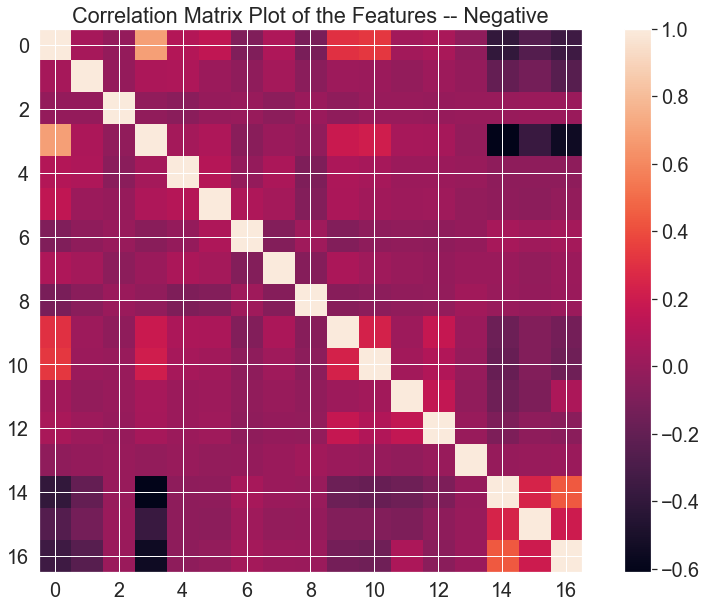

In [32]:
plt.figure(figsize = (15, 10))
plt.imshow(X_original[y == 0].corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features -- Negative')

Text(0.5, 1.0, 'Correlation Matrix Plot of the Features -- Positive')

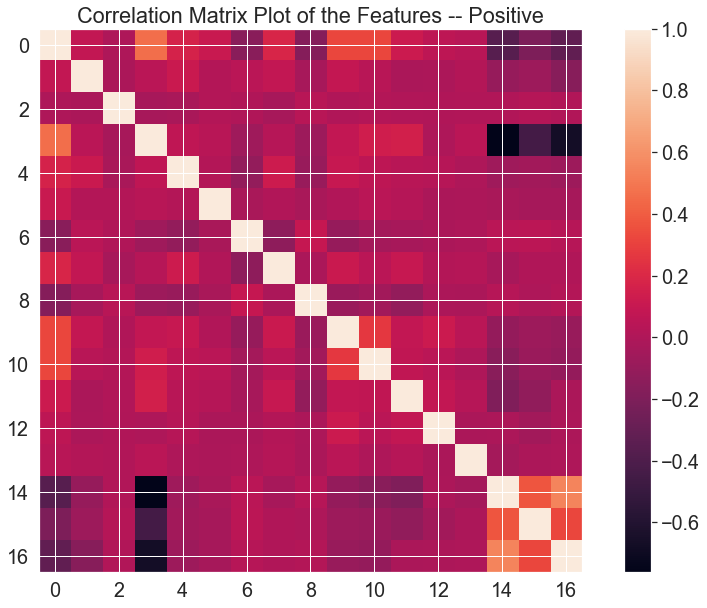

In [33]:
plt.figure(figsize = (15, 10))
plt.imshow(X_original[y== 1].corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features -- Positive')

In [34]:
X = X[['AGE','GENDER','RACE','EDUCATION','INCOME', 'CREDIT_SCORE','VEHICLE_OWNERSHIP',
            'VEHICLE_YEAR','MARRIED','CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 
            'DUIS', 'PAST_ACCIDENTS']]

In [35]:
## Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [36]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [37]:
y_pred  =  classifier.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [39]:
print(cm,ac)

[[1099  140]
 [ 235  335]] 0.7927031509121062


In [41]:
X_final = X[['AGE','GENDER','CREDIT_SCORE','VEHICLE_OWNERSHIP','VEHICLE_YEAR','MARRIED',
             'CHILDREN','POSTAL_CODE','SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS']]

In [42]:
## Final check
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.30, random_state = 0)
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_final  =  clf.predict(X_test)
clf.get_params(deep = True)

cm = confusion_matrix(y_test, y_pred_final)
ac = accuracy_score(y_test,y_pred_final)

print(cm,ac)

[[1643  212]
 [ 333  525]] 0.7991153704386288


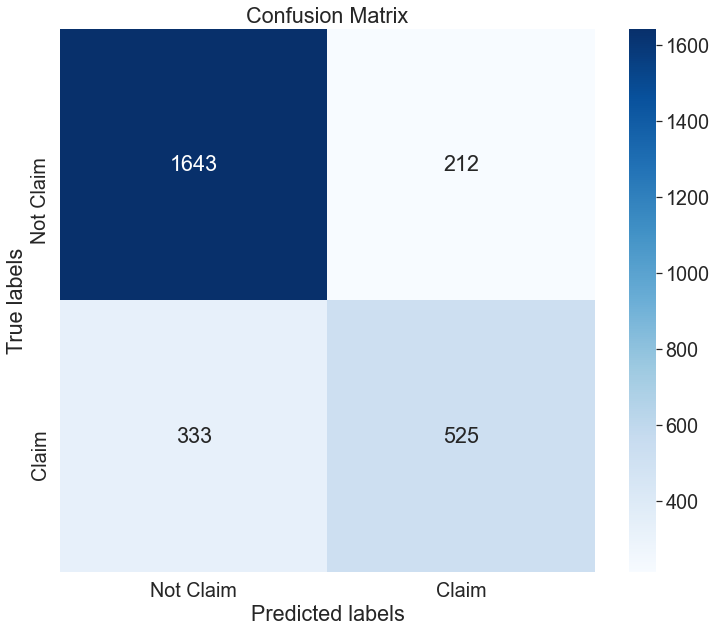

In [43]:
sns.set(font_scale=1.8)

plt.figure(figsize = (12,10))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap = 'Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Claim', 'Claim']); ax.yaxis.set_ticklabels([ 'Not Claim','Claim']);

plt.show()

In [44]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [45]:

print(metrics.classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1855
           1       0.71      0.61      0.66       858

    accuracy                           0.80      2713
   macro avg       0.77      0.75      0.76      2713
weighted avg       0.79      0.80      0.79      2713



## 4.3 ROC AUC

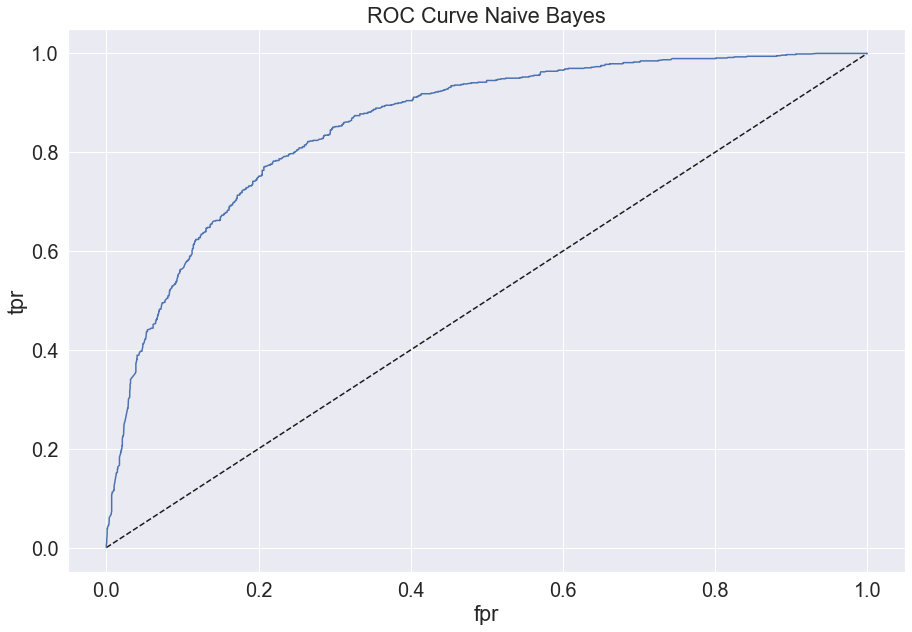

0.8561941203450637


In [46]:
from sklearn.metrics import roc_auc_score
probas = clf.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.figure(figsize = (15, 10))
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

print(roc_auc_score(y_test, probas[:, 1]))

In [47]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.316027, G-Mean=0.782


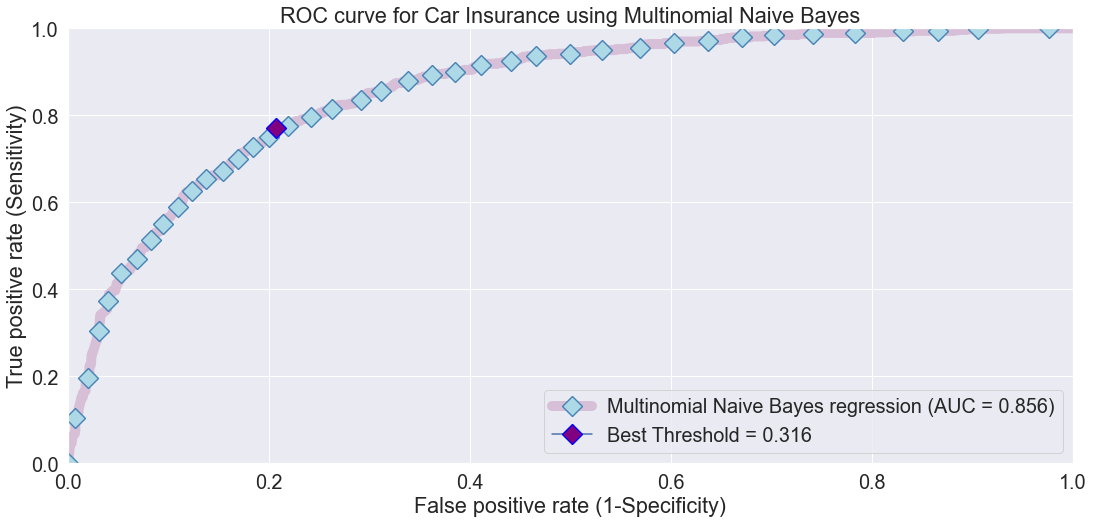

In [48]:
plt.figure(figsize = (18,8))
sns.set(font_scale=1.8)
fig = plt.plot(fpr,tpr,color='thistle',
         marker='D', linewidth = 10, 
         markerfacecolor='lightblue',markeredgecolor='steelblue', 
         markeredgewidth=1.4, markersize = 14,markevery=25,
         label = "Multinomial Naive Bayes regression (AUC = 0.856)")

plt.plot(fpr[ix], tpr[ix], 
           marker='D', 
         markerfacecolor='purple',markeredgecolor='blue', 
         markeredgewidth=1.4, markersize = 14,markevery=25,
         label = "Best Threshold = 0.316")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title('ROC curve for Car Insurance using Multinomial Naive Bayes')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Plot of the Features -- Negative')

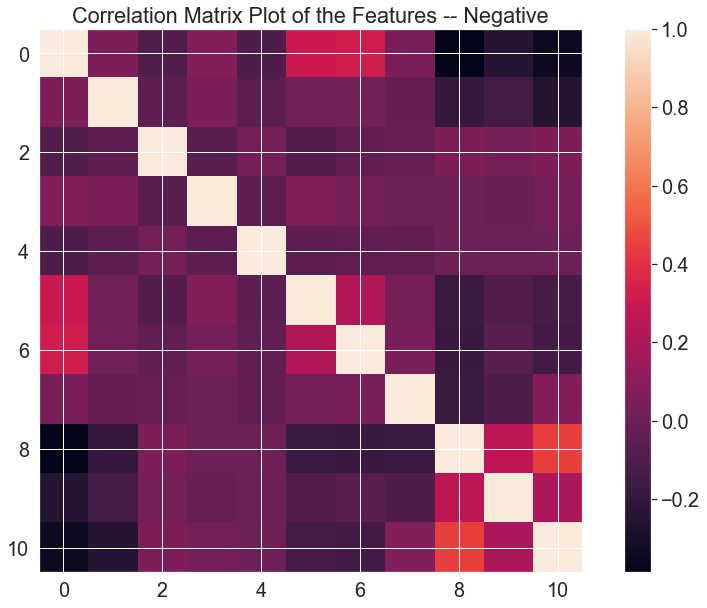

In [49]:
plt.figure(figsize = (15, 10))
plt.imshow(X_train[y_train== 0].corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features -- Negative')

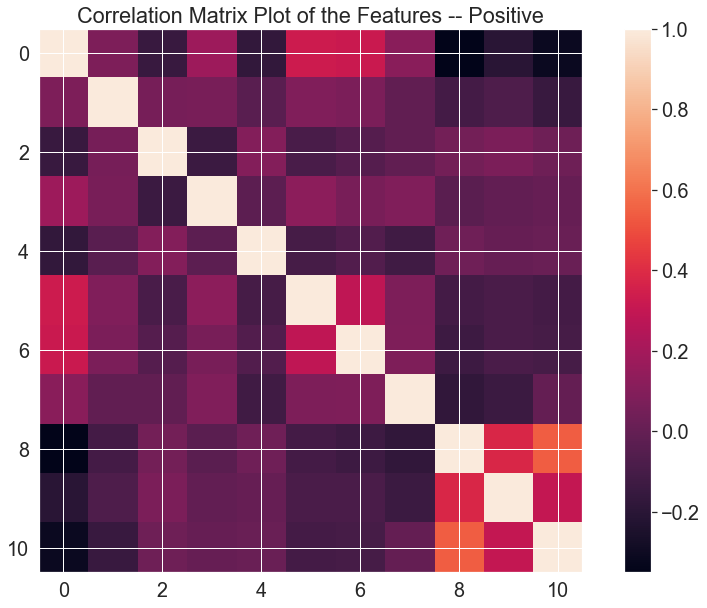

In [50]:
plt.figure(figsize = (15, 10))
plt.imshow(X_train[y_train == 1].corr())
plt.colorbar()
plt.title('Correlation Matrix Plot of the Features -- Positive');

## 4.4 Backward selection for NB
def x_sel_back(X, Y, k): # k stands for number of folds; n stands for number of variables wanted
    
    ## reindex
    #X = X.reset_index(drop = True)
    #Y = Y.reset_index(drop = True)
    
    ## Make folds
    #shuffled = X.sample(frac=1)
    #split = np.array_split(shuffled, k)  

    ## Preparing for the loop
    #MSE = np.empty(k)
    #r2 = np.empty(k)
    l = len(X.columns)
    x_selection_back = [None]*(l-1)
    X_cal = X
    x_drop = list(X.columns)
    #min_MSE_stop = float('inf')
    #min_MSE_tag = float('inf')
    #max_r2_stop = -1
    max_ac_stop = -1
    max_ac_tag = -1

    ## Select first variable
    for j in range(l):
        #min_MSE = float('inf')
        #max_r2 = -1
        max_ac = -1
        for v in X_cal.columns:
            X_fixed = X_cal.drop(columns = v)
            for i in range(k):
        
                # Set train/test for X/Y
                #Y_train = Y.drop(split[i].index)
                #Y_test = Y.iloc[split[i].index, ]
                #X_train = X_fixed.drop(split[i].index)
                #X_test = X_fixed.iloc[split[i].index, ]
    
                # Run linear regression
                #lm = LinearRegression()
                #lm.fit(X_train, Y_train)
                clf = MultinomialNB()
                ac_cross = cross_val_score(clf, X_fixed, Y, cv=k, scoring='accuracy')
     
                # Predictions on test dataset
                #test_predictions = lm.predict(X_test)
    
                # Calculate MSE and Compare the values
                #MSE[i] = metrics.mean_squared_error(Y_test, test_predictions)
        
            # Comparing MSE
            #avg_MSE = MSE_cross.mean()
            #avg_r2 = r2_cross.mean()
            avg_ac = ac_cross.mean()
            if (avg_ac > max_ac) & (avg_ac >= max_ac_stop):
                x_selection_back[j] = v
                #min_MSE = avg_MSE
                max_ac = avg_ac
                #print(x_selection_back)
                #if (v == X_cal.columns[-1]) & (min_MSE > min_MSE_stop) & (avg_MSE > min_MSE_stop):
                  #  return[x_drop, min_MSE]
                  #  print(min_MSE, x_selection_back)
        if x_selection_back[j] == None:
            #print(lm.coef_, lm.intercept_)
            return[x_drop, max_ac_tag]
        X_cal = X_cal.drop(x_selection_back[j], axis = 1)
        x_drop.remove(x_selection_back[j])
        #min_MSE_stop = min_MSE
        #min_MSE_tag = min_MSE
        max_ac_stop = max_ac
        max_ac_tag = max_ac
    
    if None not in x_selection_back:
        return[x_drop, max_ac]